# Creacion del modelo de regresion multiple.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Indicamos que los tipos de datos float se muestren con 2 decimales
pd.options.display.float_format = '{:.2f}'.format

**Planteamiento del problema**

- Se quiere predecir el numero de bicicletas demandadas para cada hora del dia.

**Informacion del dataset**:

Tomado de: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Actualmente, las bicicletas de alquiler se introducen en muchas ciudades urbanas para mejorar la comodidad de la movilidad. Es importante que la bicicleta de alquiler esté disponible y accesible para el público en el momento adecuado, ya que reduce el tiempo de espera. Con el tiempo, proporcionar a la ciudad un suministro estable de bicicletas de alquiler se convierte en una preocupación importante. La parte crucial es la predicción del conteo de bicicletas requerido en cada hora para el suministro estable de bicicletas de alquiler.
El conjunto de datos contiene información meteorológica (temperatura persibida, nevadas, precipitaciones y visibilidad), el número de bicicletas alquiladas por hora e información sobre la estacion del año.

In [2]:
# Importacion de los datos:
df = pd.read_csv("data/bike_ml.csv")

## Breve exploracion de los datos:

In [3]:
df.head()

,season,day_div,holiday,°C,humidity,solar_rad,wind_speed,visibility,rain/snow,rented_bike
0,Winter,madrugada,1,-3.20,40,0.00,0.50,1358,0,206
1,Winter,madrugada,1,-3.30,41,0.00,0.70,2000,0,230
2,Winter,madrugada,1,-3.70,42,0.00,0.90,2000,0,178
3,Winter,madrugada,1,-4.00,44,0.00,1.00,2000,0,119
4,Winter,madrugada,1,-4.20,53,0.00,1.10,1994,0,62


In [4]:
df.shape

(7721, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       7721 non-null   object 
 1   day_div      7721 non-null   object 
 2   holiday      7721 non-null   int64  
 3   °C           7721 non-null   float64
 4   humidity     7721 non-null   int64  
 5   solar_rad    7721 non-null   float64
 6   wind_speed   7721 non-null   float64
 7   visibility   7721 non-null   int64  
 8   rain/snow    7721 non-null   int64  
 9   rented_bike  7721 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 603.3+ KB


C:\Users\Adavid\AppData\Local\Temp\ipykernel_16036\231322208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

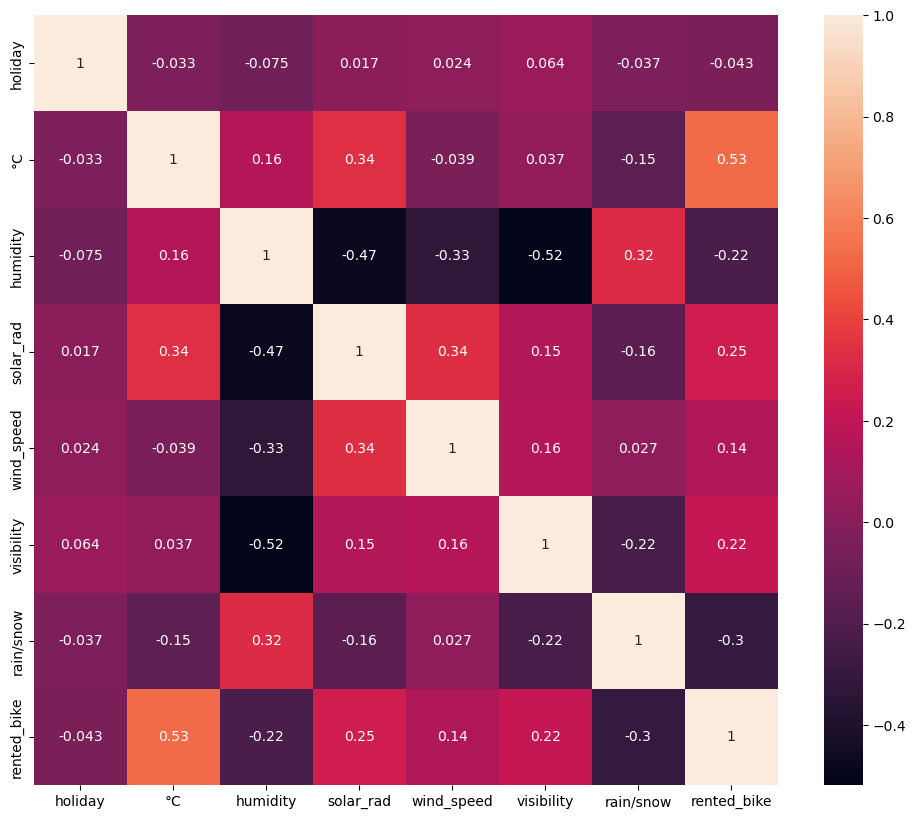

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)

## Modelos de machine learning.

In [7]:
def show_errors(y_test, y_test_hat, type: str):
    print(f"Errores del {type}")
    print("R2:", r2_score(y_test, y_test_hat))
    print("mse:", mean_squared_error(y_test, y_test_hat))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_test_hat)))
    print("mae:", mean_absolute_error(y_test, y_test_hat))

### Creacion de las variables dummies:

In [8]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Variables dummies:

In [9]:
# Definimos una instancia del transformer:
one_hot_encoder = OneHotEncoder(categories=[['madrugada', 'mañana', 'tarde', 'noche'], ["Winter", "Spring", "Summer", "Autumn"]], drop='first')

In [10]:
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(df[["day_div", "season"]])

OneHotEncoder(categories=[['madrugada', 'mañana', 'tarde', 'noche'],
                          ['Winter', 'Spring', 'Summer', 'Autumn']],
              drop='first')

In [11]:
 # Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
 matriz_dummies = one_hot_encoder.transform(df[['day_div', "season"]]).toarray()

In [12]:
# Generamos los nombres de las variables dummies:
nombres_dummies = one_hot_encoder.get_feature_names_out()

In [13]:
# Generamos el dataframe con las variables dummies con las matrices y columnas
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=df.index)

In [14]:
df_dummies = df.join(df_dummies)

In [15]:
df_dummies.drop(columns=["day_div", "season"], inplace=True)

In [16]:
df_dummies.head()

,holiday,°C,humidity,solar_rad,wind_speed,visibility,rain/snow,rented_bike,day_div_mañana,day_div_tarde,day_div_noche,season_Spring,season_Summer,season_Autumn
0,1,-3.20,40,0.00,0.50,1358,0,206,0.00,0.00,0.00,0.00,0.00,0.00
1,1,-3.30,41,0.00,0.70,2000,0,230,0.00,0.00,0.00,0.00,0.00,0.00
2,1,-3.70,42,0.00,0.90,2000,0,178,0.00,0.00,0.00,0.00,0.00,0.00
3,1,-4.00,44,0.00,1.00,2000,0,119,0.00,0.00,0.00,0.00,0.00,0.00
4,1,-4.20,53,0.00,1.10,1994,0,62,0.00,0.00,0.00,0.00,0.00,0.00


### Separacion del dataframe:

In [17]:
variables_exogenas = ["holiday", "°C", "solar_rad", "wind_speed", "humidity", "rain/snow", "day_div_mañana", "day_div_tarde", "day_div_noche", "season_Spring", "season_Summer", "season_Autumn"]

X = df_dummies[variables_exogenas]
y = df_dummies["rented_bike"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Modelo de regresion lineal multiple:

In [18]:
# Se define el modelo:
modelo = LinearRegression().fit(X_train,y_train)

y_train_hat = modelo.predict(X_train)
y_test_hat = modelo.predict(X_test)

In [19]:
# error train:
show_errors(y_train, y_train_hat, "train")

Errores del train
R2: 0.5639821090682513
mse: 183704.6199341936
rmse: 428.6077693348472
mae: 327.19031889545636


In [20]:
# Error test:
show_errors(y_test, y_test_hat, "test")

Errores del test
R2: 0.5599747506184708
mse: 194184.98725242654
rmse: 440.6642568355488
mae: 329.2751165799968


Text(0.5, 1.0, 'Modelo regresion multiple (test)')

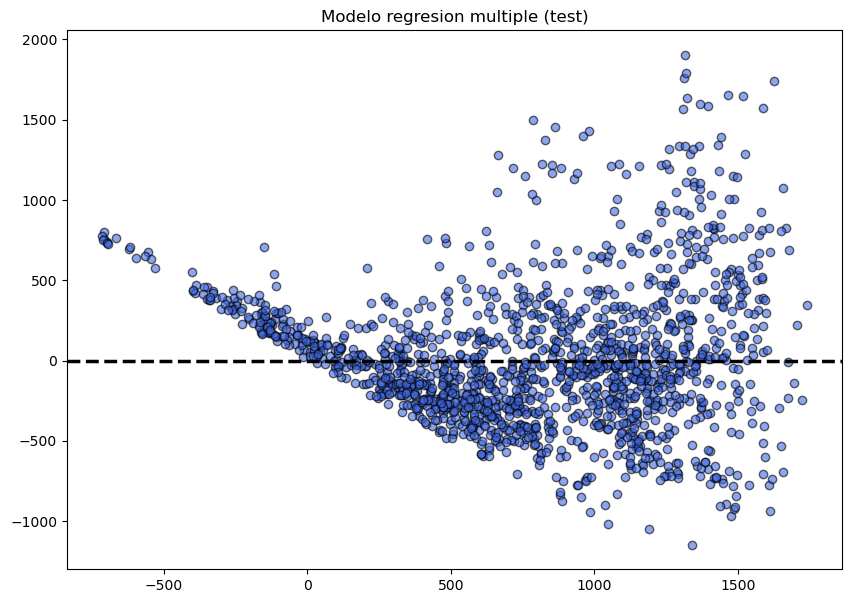

In [21]:
# Realizamos el gráfico
residuos = y_test - y_test_hat

plt.figure(figsize=(10,7))
plt.scatter(x=y_test_hat, y=residuos,
            alpha=0.6, c='royalblue', edgecolor='black')
plt.axhline(y=0, c='black', ls='--', linewidth=2.5)
plt.title("Modelo regresion multiple (test)")

Se puede observar que este modelo no cumple con todas los supuestos de guass-markov, especificamente parece ser que este modelo no satisface el supuesto de no linealidad. Se procede a realizar una trasformacion no lineal (X^3) para mejorar este aspecto.

### Modelo de regresion polinomial:

In [22]:
# Se procesan los polinomios
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Se entrena el modelo
reg = LinearRegression().fit(X_train_poly, y_train)

y_train_hat = reg.predict(X_train_poly)
y_test_hat = reg.predict(X_test_poly)

In [23]:
# error train:
show_errors(y_train, y_train_hat, "train")

Errores del train
R2: 0.7871159001451955
mse: 89693.09165339143
rmse: 299.48804926639633
mae: 206.43982859413822


In [24]:
# Error test:
show_errors(y_test, y_test_hat, "test")

Errores del test
R2: 0.7692366895785443
mse: 101836.8163088396
rmse: 319.1188122139458
mae: 221.1074515468076


Text(0.5, 1.0, 'Modelo regresion polinomica (test)')

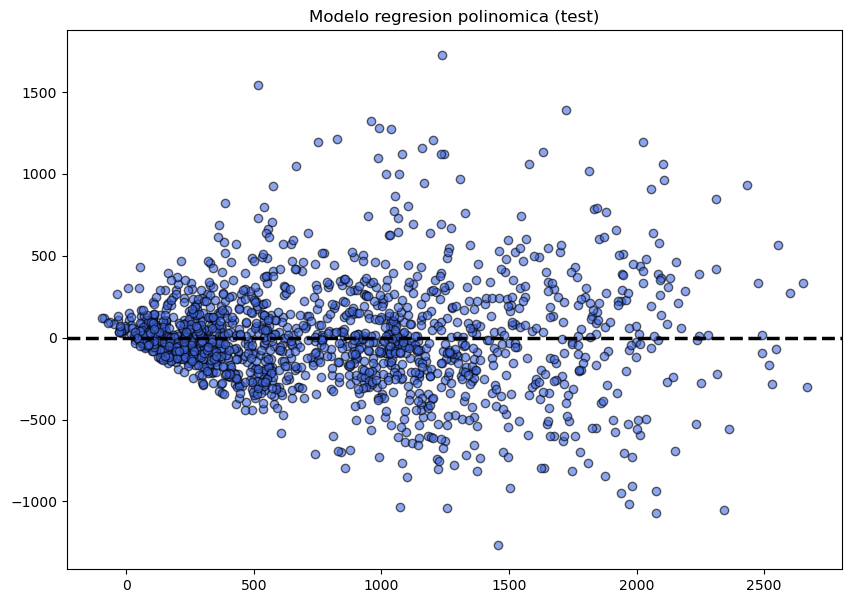

In [25]:
# Realizamos el gráfico
residuos = y_test - y_test_hat

plt.figure(figsize=(10,7))
plt.scatter(x=y_test_hat, y=residuos,
            alpha=0.6, c='royalblue', edgecolor='black')
plt.axhline(y=0, c='black', ls='--', linewidth=2.5)
plt.title("Modelo regresion polinomica (test)")

Se puede ver que este modelo se comporta mucho mejor que el anterior, aunque todavía podria presentar algunos inconvenientes. Se intentara resolver este problema con el metodo de ensamble.

### Metodo de ensamble:

In [26]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train.ravel())

y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

In [27]:
# Error train:
show_errors(y_train, y_train_hat, "train")

Errores del train
R2: 0.9687421735547267
mse: 13169.65942573389
rmse: 114.75913656756873
mae: 75.78967550271403


In [28]:
# Error test:
show_errors(y_test, y_test_hat, "test")

Errores del test
R2: 0.7719050336358563
mse: 100659.26488995513
rmse: 317.26844294690756
mae: 213.53421790722763


Text(0, 0.5, 'Y Predicción')

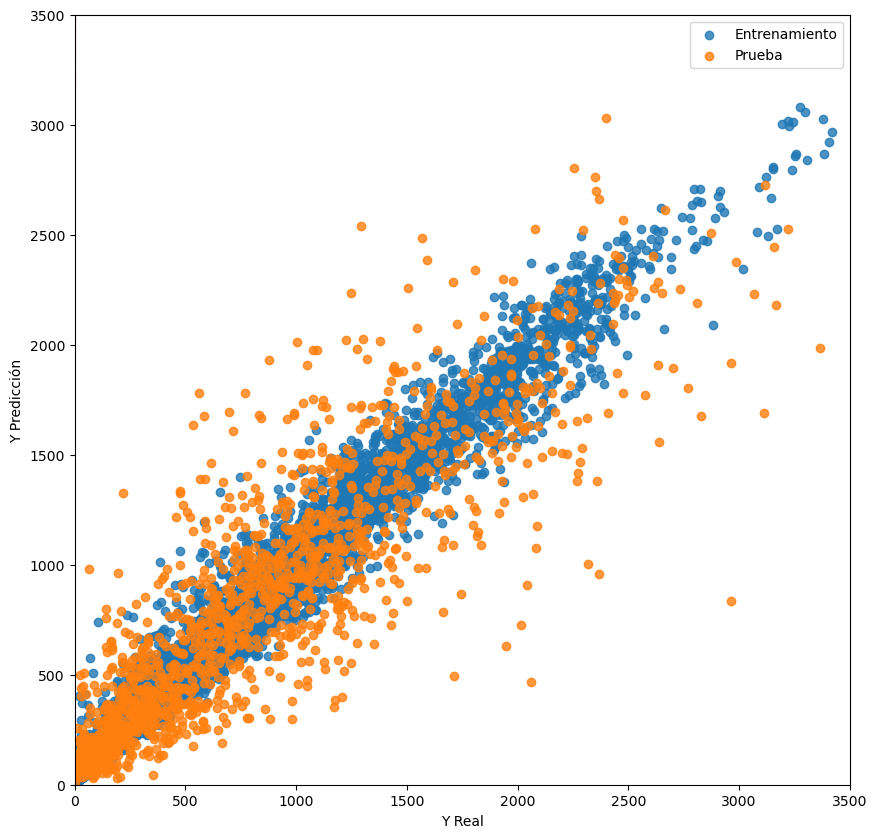

In [29]:
# Realizamos el gráfico

plt.figure(figsize=(10,10))
plt.axis([0,3500,0,3500])
plt.plot([[0,0],[3500,3500]], "r--")
plt.scatter(y_train,y_train_hat, label="Entrenamiento",alpha=0.8)
plt.scatter(y_test,y_test_hat, label="Prueba", alpha=0.8)
#Preparamos las etiquetas
plt.legend()
plt.xlabel("Y Real")
plt.ylabel("Y Predicción")

Se observa que la diferencias entre $R^{2}$ del modelo de regresion polinomial y el modelo de ensamble no es muy grande. Se procede ambos modelos.

#### Exportacion del modelo polinomial:

In [30]:
import pickle

In [31]:
# Importacion del modelo de ensamble:
pickle_out = open("data/modeloE.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()